In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/cities_air_quality_water_pollution.18-10-2021.csv")

In [ ]:
df.head(10)

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
5,Bern,"""Canton of Bern""","""Switzerland""",94.318182,12.500000
6,Geneva,"""Canton of Geneva""","""Switzerland""",71.538462,17.372881
7,Zurich,"""Canton of Zurich""","""Switzerland""",83.809524,10.714286
8,Basel,"""""","""Switzerland""",81.666667,26.923077
9,London,"""England""","""United Kingdom""",37.042254,40.716374


In [ ]:
df.columns = ['City', 'Region', 'Country', 'AirQuality', 'WaterPollution']

In [ ]:
df

,City,Region,Country,AirQuality,WaterPollution
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,"""Medina Province""","""Saudi Arabia""",0.000000,50.000000
3959,Cordoba,"""Andalusia""","""Spain""",85.714286,8.333333
3960,Vic,"""Catalonia""","""Spain""",100.000000,0.000000
3961,Segovia,"""Castile and Leon""","""Spain""",100.000000,0.000000


In [ ]:
#Check Null
df.isnull().values.any()

False

In [ ]:
#Showing Columns
df.columns

Index(['City', 'Region', 'Country', 'AirQuality', 'WaterPollution'], dtype='object')

In [ ]:
#Describing Data Set
df.describe()

,AirQuality,WaterPollution
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


In [ ]:
#show the information about dataset
df_dtype=df.dtypes
df_missing=df.isna().mean().round(5)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City,0.0,object,3963,3796,Albany,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,0.0,object,3963,1153,"""""",425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,0.0,object,3963,177,"""United States of America""",842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AirQuality,0.0,float64,3963.0,NaN,NaN,NaN,62.253452,30.944753,0.0,37.686567,69.444444,87.5,100.0
WaterPollution,0.0,float64,3963.0,NaN,NaN,NaN,44.635372,25.66391,0.0,25.0,50.0,57.719393,100.0


In [ ]:
#Data set Shape
df.shape

(3963, 5)

In [ ]:
#Data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3963 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [ ]:
df.City.value_counts()

Albany          4
Rochester       4
Alexandria      4
Jackson         4
Cambridge       4
               ..
Murfreesboro    1
Debrecen        1
Sierra Vista    1
Seward          1
Zamora city     1
Name: City, Length: 3796, dtype: int64

In [ ]:
df.Region.value_counts()

 ""                       425
 "England"                142
 "California"             122
 "Texas"                   51
 "Florida"                 48
                         ... 
 "Durango"                  1
 "Elbasan County"           1
 "Bar Municipality"         1
 "Korce County"             1
 "Diyarbakir Province"      1
Name: Region, Length: 1153, dtype: int64

In [ ]:
df.Country.value_counts()

 "United States of America"      842
 "People's Republic of China"    238
 "United Kingdom"                170
 "Canada"                        157
 "India"                         154
                                ... 
 "El Salvador"                     1
 "Suriname"                        1
 "Haiti"                           1
 "Togo"                            1
 "Lesotho"                         1
Name: Country, Length: 177, dtype: int64

In [ ]:
 df.AirQuality.value_counts()

100.000000    691
75.000000     385
0.000000      277
50.000000     257
87.500000     203
             ... 
5.952381        1
57.720588       1
68.611111       1
88.848039       1
30.468750       1
Name: AirQuality, Length: 667, dtype: int64

In [ ]:
df.WaterPollution.value_counts()

50.000000     1066
0.000000       446
25.000000      308
75.000000      268
100.000000     187
              ... 
46.774194        1
98.076923        1
84.027778        1
46.169355        1
19.230769        1
Name: WaterPollution, Length: 561, dtype: int64

In [ ]:
# get mode of a pandas column
df.mode()

,City,Region,Country,AirQuality,WaterPollution
0,Albany,"""""","""United States of America""",100.0,50.0
1,Alexandria,NaN,NaN,NaN,NaN
2,Cambridge,NaN,NaN,NaN,NaN
3,Jackson,NaN,NaN,NaN,NaN
4,Rochester,NaN,NaN,NaN,NaN


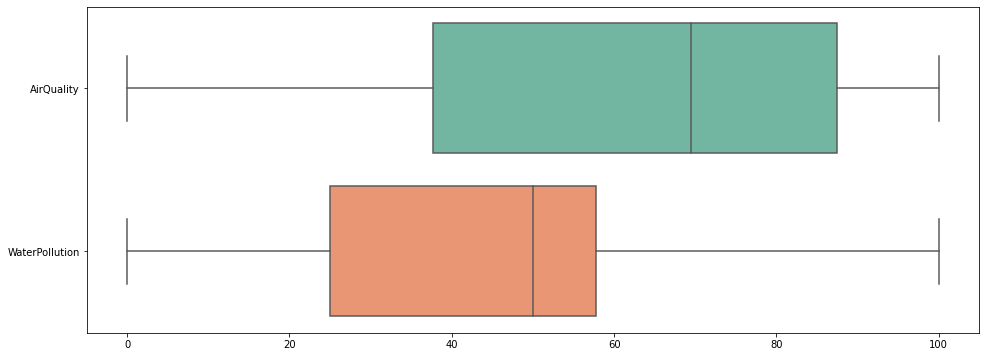

In [ ]:
#Visualizing Boxplot
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

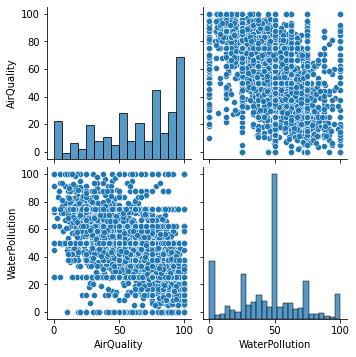

In [ ]:
#Drawing Pairplot
sns.pairplot(df);

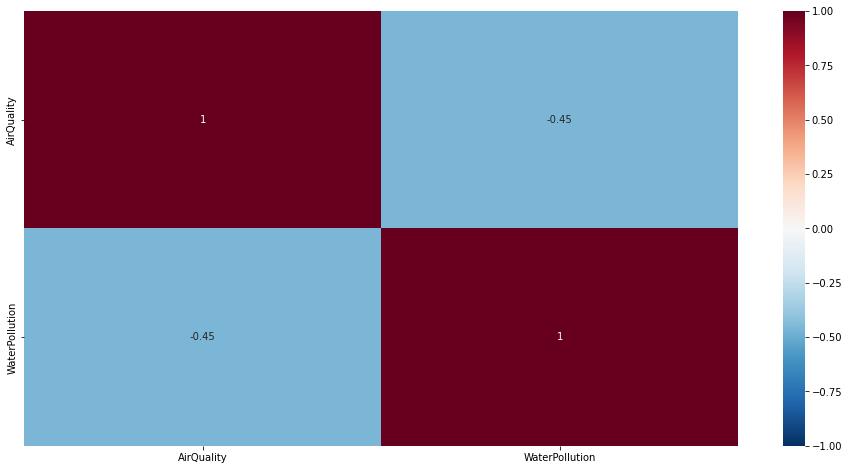

In [ ]:
#Generating Heatmap
correlation = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [ ]:
pd.pivot_table(df, index=['Country'], values=['AirQuality',	'WaterPollution'], aggfunc=['median'])

median               
               AirQuality WaterPollution
Country                                 
 "Afghanistan"  31.085526      62.500000
 "Albania"      58.333333      62.500000
 "Algeria"      50.000000      50.000000
 "Andorra"      43.750000      25.000000
 "Angola"       15.000000      81.250000
...                   ...            ...
 "Venezuela"    25.000000      95.714286
 "Vietnam"      50.961538      66.346154
 "Yemen"        29.166667      83.333333
 "Zambia"       54.166667      99.038462
 "Zimbabwe"     44.230769      73.214286

[177 rows x 2 columns]

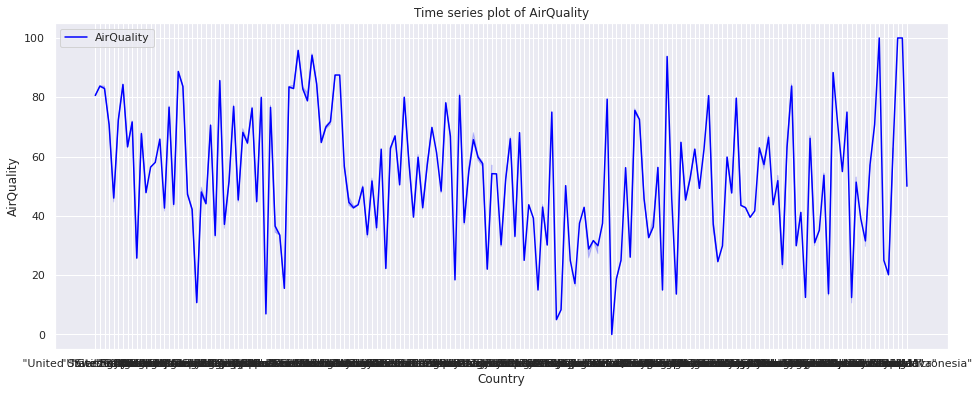

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Time series plot of AirQuality')
ax = sns.lineplot(x="Country", y="AirQuality",ci=10,color="blue", label="AirQuality",data=df)

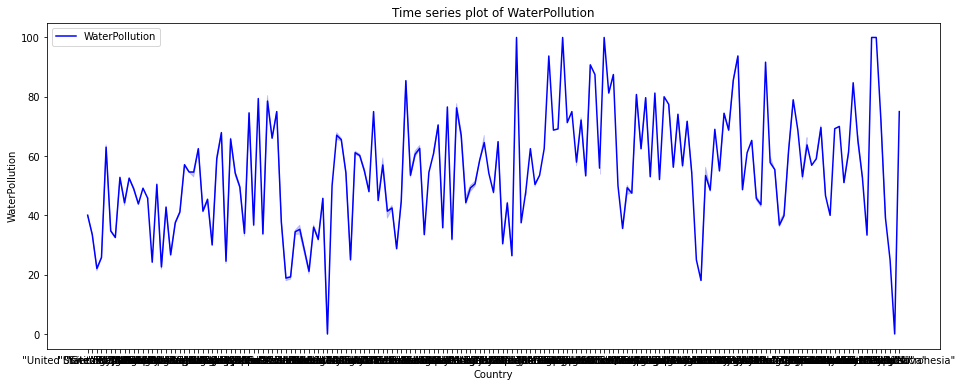

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Time series plot of WaterPollution')
ax = sns.lineplot(x="Country", y="WaterPollution",ci=10,color="blue", label="WaterPollution",data=df)

In [ ]:
#top 10 air bad_quality countries
df[['Country', 'AirQuality']].groupby(['Country']).agg('mean').sort_values('AirQuality',
     ascending=True).head(10).style.background_gradient(cmap='viridis')

,AirQuality
Country,
"""Central African Republic""",0.000000
"""Guinea""",5.000000
"""Cote d'Ivoire""",6.944444
"""Liberia""",8.333333
"""People's Republic of China""",10.761067
"""Myanmar""",12.462207
"""Haiti""",12.500000
"""Madagascar""",13.636364
"""Kazakhstan""",13.737825


In [ ]:
#top 10 water polluted countries
df[['Country', 'WaterPollution']].groupby(['Country']).agg('mean').sort_values('WaterPollution',
     ascending=False).head(10).style.background_gradient(cmap='viridis')

,WaterPollution
Country,
"""Niger""",100.000000
"""Central African Republic""",100.000000
"""Benin""",100.000000
"""Sierra Leone""",100.000000
"""Federated States of Micronesia""",100.000000
"""Guinea""",93.750000
"""Maldives""",93.750000
"""Marshall Islands""",91.666667
"""Lebanon""",90.763449


In [ ]:
df[['Country', 'WaterPollution']].groupby(['Country']).agg('mean').sort_values('WaterPollution',
        ascending=False).style.background_gradient(cmap='inferno')

,WaterPollution
Country,
"""Niger""",100.000000
"""Central African Republic""",100.000000
"""Benin""",100.000000
"""Sierra Leone""",100.000000
"""Federated States of Micronesia""",100.000000
"""Guinea""",93.750000
"""Maldives""",93.750000
"""Marshall Islands""",91.666667
"""Lebanon""",90.763449


In [ ]:
df[['Region', 'WaterPollution']].groupby(['Region']).agg('mean').sort_values('WaterPollution',
        ascending=False).style.background_gradient(cmap='inferno')

,WaterPollution
Region,
"""Damietta Governorate""",100.000000
"""Western Area""",100.000000
"""Savannakhet Province""",100.000000
"""Ghardaia Province""",100.000000
"""North Western Province""",100.000000
"""Suez Governorate""",100.000000
"""Maranhao""",100.000000
"""Ancash""",100.000000
"""Michoacan""",100.000000


In [ ]:
df[['Region', 'AirQuality']].groupby(['Region']).agg('mean').sort_values('AirQuality',
        ascending=True).style.background_gradient(cmap='inferno')

,AirQuality
Region,
"""Sakon Nakhon""",0.000000
"""Siirt Province""",0.000000
"""Espaillat Province""",0.000000
"""Republic of Khakassia""",0.000000
"""Batman Province""",0.000000
"""Ilam Province""",0.000000
"""Anambra State""",0.000000
"""Ancash""",0.000000
"""Ningxia""",0.000000


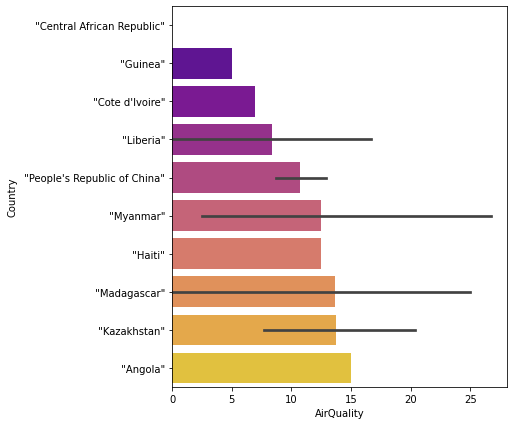

In [ ]:
#BAD AIR QUALITIES COUNTRY LIST
sorted=df.groupby(['Country'])['AirQuality'].agg('mean').reset_index().sort_values('AirQuality', ascending=True).head(10)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['Country'], x=df['AirQuality'], palette='plasma', order=sorted['Country'])
plt.show()

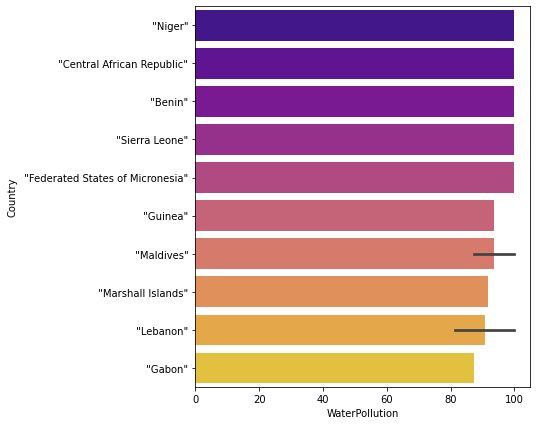

In [ ]:
#POLLUTED COUNTRY LIST
sorted=df.groupby(['Country'])['WaterPollution'].agg('mean').reset_index().sort_values('WaterPollution', ascending=False).head(10)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['Country'], x=df['WaterPollution'], palette='plasma', order=sorted['Country'])
plt.show()

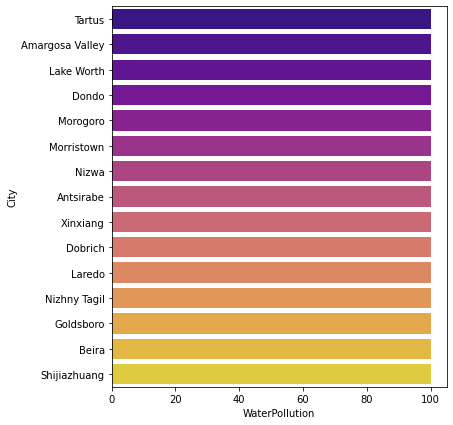

In [ ]:
sorted=df.groupby(['City'])['WaterPollution'].agg('mean').reset_index().sort_values('WaterPollution', ascending=False).head(15)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['City'], x=df['WaterPollution'], palette='plasma', order=sorted['City'])
plt.show()

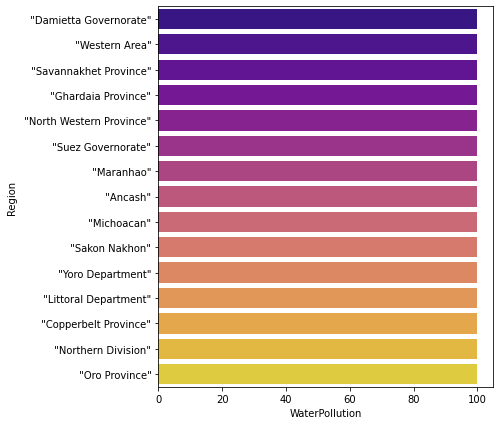

In [ ]:
sorted=df.groupby(['Region'])['WaterPollution'].agg('mean').reset_index().sort_values('WaterPollution', ascending=False).head(15)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['Region'], x=df['WaterPollution'], palette='plasma', order=sorted['Region'])
plt.show()

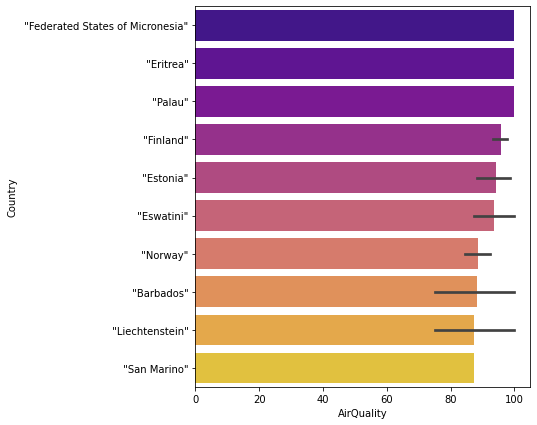

In [ ]:
#good air qualities Country
sorted=df.groupby(['Country'])['AirQuality'].agg('mean').reset_index().sort_values('AirQuality', ascending=False).head(10)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['Country'], x=df['AirQuality'], palette='plasma', order=sorted['Country'])
plt.show()

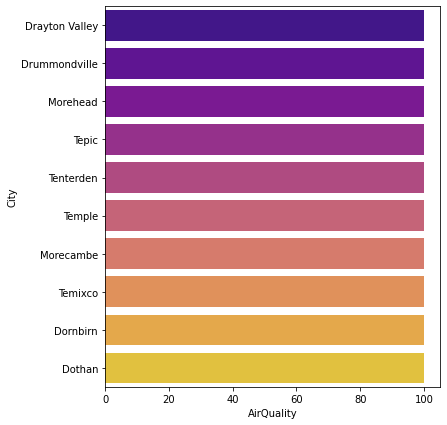

In [ ]:
#good air qualities city
sorted=df.groupby(['City'])['AirQuality'].agg('mean').reset_index().sort_values('AirQuality', ascending=False).head(10)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['City'], x=df['AirQuality'], palette='plasma', order=sorted['City'])
plt.show()

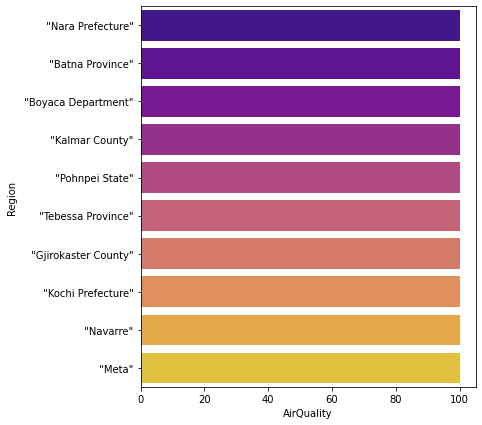

In [ ]:
#good air qualities Region
sorted=df.groupby(['Region'])['AirQuality'].agg('mean').reset_index().sort_values('AirQuality', ascending=False).head(10)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['Region'], x=df['AirQuality'], palette='plasma', order=sorted['Region'])
plt.show()

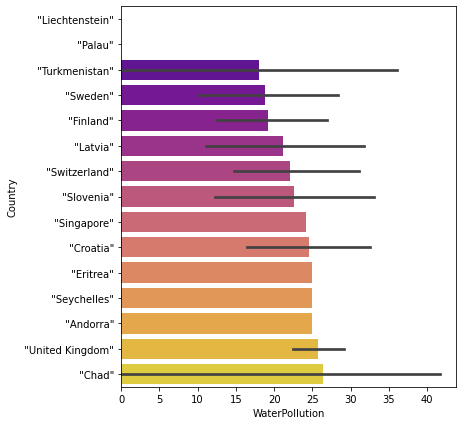

In [ ]:
#MINIMUM PLLOUTED COUNTRY
sorted=df.groupby(['Country'])['WaterPollution'].agg('mean').reset_index().sort_values('WaterPollution', ascending=True).head(15)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['Country'], x=df['WaterPollution'], palette='plasma', order=sorted['Country'])
plt.show()


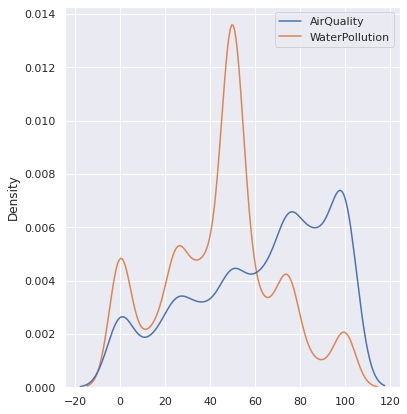

In [ ]:
sns.kdeplot(data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


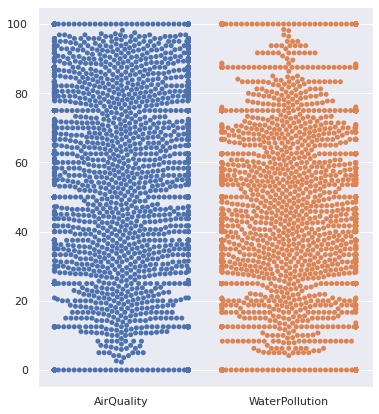

In [ ]:
sns.swarmplot(data=df)

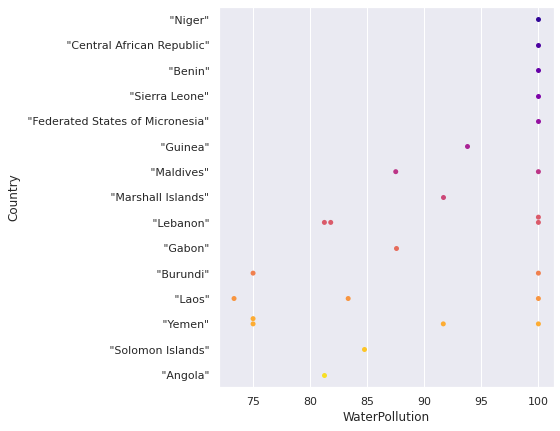

In [ ]:
#Polluted country
sorted=df.groupby(['Country'])['WaterPollution'].agg('mean').reset_index().sort_values('WaterPollution', ascending=False).head(15)
plt.rcParams['figure.figsize']=6,7
sns.swarmplot(y=df['Country'], x=df['WaterPollution'], palette='plasma', order=sorted['Country'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


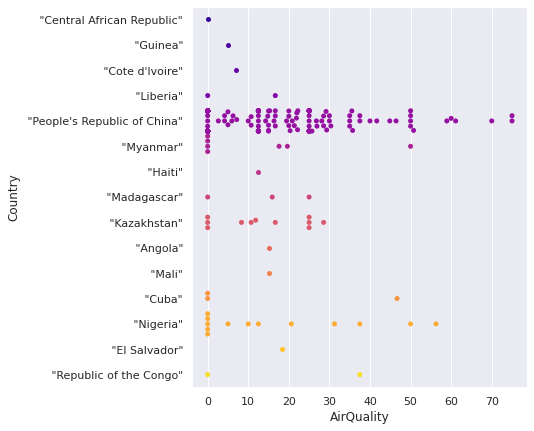

In [ ]:
#bad airquality
sorted=df.groupby(['Country'])['AirQuality'].agg('mean').reset_index().sort_values('AirQuality', ascending=True).head(15)
plt.rcParams['figure.figsize']=6,7
sns.swarmplot(y=df['Country'], x=df['AirQuality'], palette='plasma', order=sorted['Country'])
plt.show()

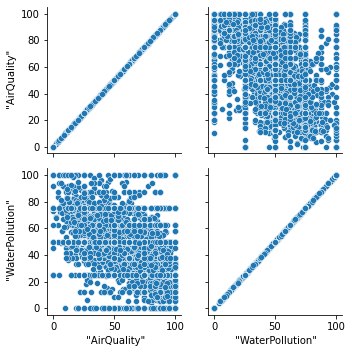

In [ ]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)